In [17]:
import pandas as pd

df = pd.read_csv("../data/raw/kd_all.csv")
df = df[df['GP'] >= 50]
print(df)

   SEASON_ID TEAM_ABBREVIATION  PLAYER_AGE  GP  GS   MIN   PTS  REB  AST  \
0    2007-08               SEA        19.0  80  80  2768  1624  348  192   
1    2008-09               OKC        20.0  74  74  2885  1871  482  205   
2    2009-10               OKC        21.0  82  82  3239  2472  623  231   
3    2010-11               OKC        22.0  78  78  3038  2161  533  214   
4    2011-12               OKC        23.0  66  66  2546  1850  527  231   
5    2012-13               OKC        24.0  81  81  3119  2280  640  374   
6    2013-14               OKC        25.0  81  81  3122  2593  598  445   
8    2015-16               OKC        27.0  72  72  2578  2029  589  361   
9    2016-17               GSW        28.0  62  62  2070  1555  513  300   
10   2017-18               GSW        29.0  68  68  2325  1792  464  366   
11   2018-19               GSW        30.0  78  78  2702  2027  497  457   
13   2021-22               BKN        33.0  55  55  2047  1643  407  351   
17   2023-24

In [18]:
import matplotlib.pyplot as plt

def plot_stat(stat, ylabel):
    plt.figure(figsize=(10, 6))
    ln_stat = plt.plot(df['SEASON_ID'], df[stat], marker='o')
    moyenne_stat = df[stat].mean()
    median_stat = df[stat].median()
    h = plt.axhline(moyenne_stat, color="purple", linestyle="-")
    h_bis = plt.axhline(median_stat, color="orange", linestyle="--")
    plt.axvline(x="2018-19", color="brown", linestyle="--", linewidth=2)
    plt.text("2018-19", df[stat].max(), "Blessure tendon (2019)", 
             rotation=90, color="brown", ha="right", va="center")
    plt.legend([ln_stat, h, h_bis], [stat, f"Moyenne: {moyenne_stat:.1f}", f"Médiane: {median_stat:.1f}"])
    plt.title(f"Kevin Durant's {stat} per Season")
    plt.xlabel("Season")
    plt.ylabel(ylabel)
    plt.xticks(rotation=60)
    plt.show()

C:\Users\abdal\AppData\Local\Temp\ipykernel_21792\3648407365.py:13: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ln_stat, h, h_bis], [stat, f"Moyenne: {moyenne_stat:.1f}", f"Médiane: {median_stat:.1f}"])


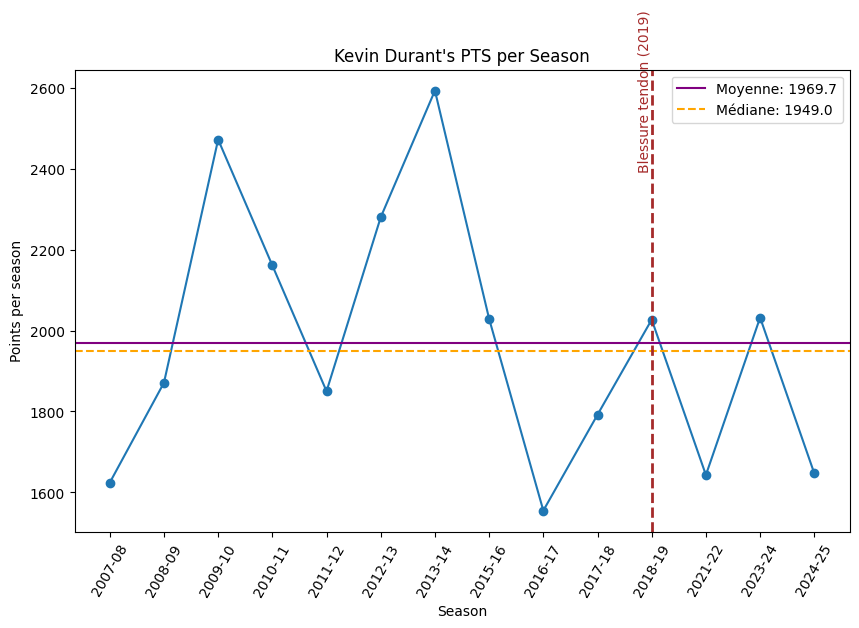

In [19]:
plot_stat('PTS', 'Points per season')

C:\Users\abdal\AppData\Local\Temp\ipykernel_21792\3648407365.py:13: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ln_stat, h, h_bis], [stat, f"Moyenne: {moyenne_stat:.1f}", f"Médiane: {median_stat:.1f}"])


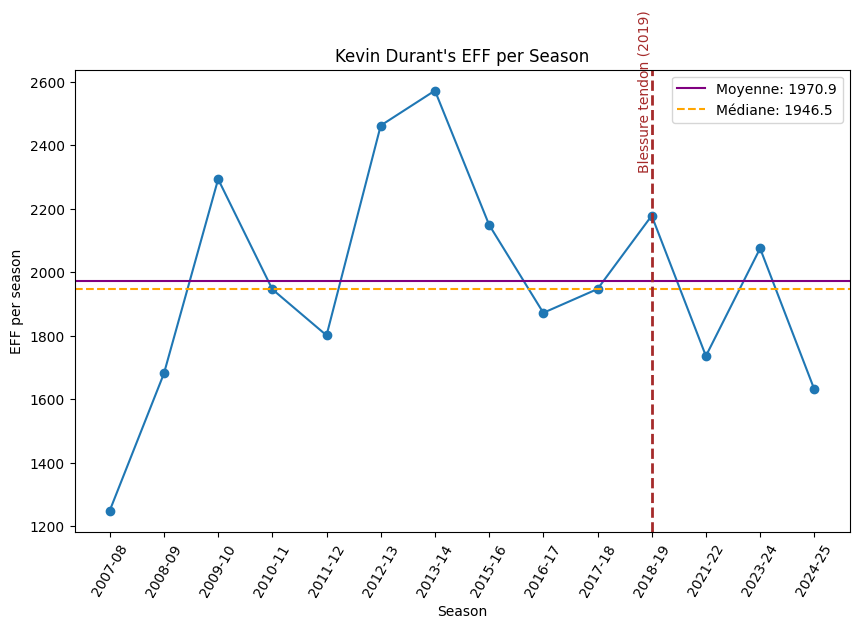

In [20]:
plot_stat('EFF', 'EFF per season')

C:\Users\abdal\AppData\Local\Temp\ipykernel_21792\3648407365.py:13: UserWarning: Legend does not support handles for list instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/users/explain/axes/legend_guide.html#controlling-the-legend-entries
  plt.legend([ln_stat, h, h_bis], [stat, f"Moyenne: {moyenne_stat:.1f}", f"Médiane: {median_stat:.1f}"])


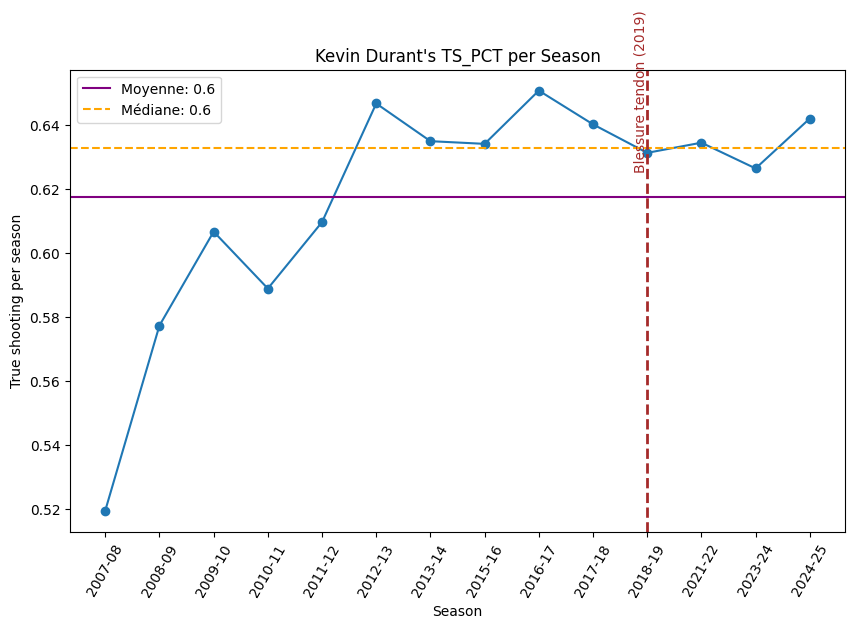

In [21]:
plot_stat('TS_PCT', 'True shooting per season')

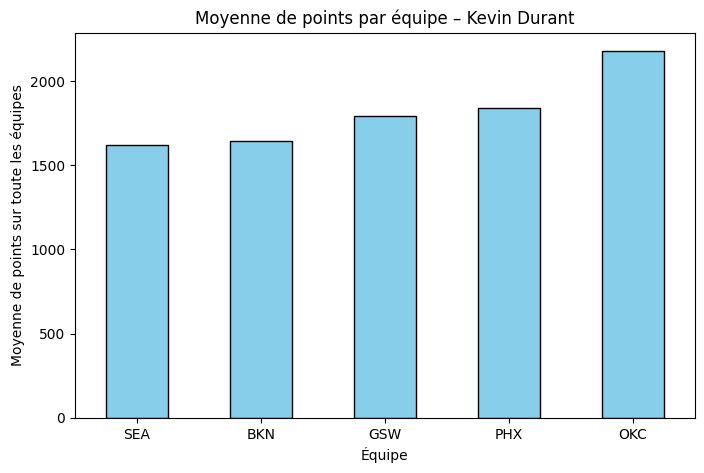

In [22]:

# calcul des moyennes de points par équipe
pts_team = df.groupby("TEAM_ABBREVIATION")["PTS"].mean().sort_values()

# barplot
plt.figure(figsize=(8,5))
pts_team.plot(kind="bar", color="skyblue", edgecolor="black")

plt.title("Moyenne de points par équipe – Kevin Durant")
plt.xlabel("Équipe")
plt.ylabel("Moyenne de points sur toute les équipes")
plt.xticks(rotation=0)
plt.show()

C:\Users\abdal\AppData\Local\Temp\ipykernel_21792\752257076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="TEAM_ABBREVIATION", y="PTS", data=df, palette="pastel")


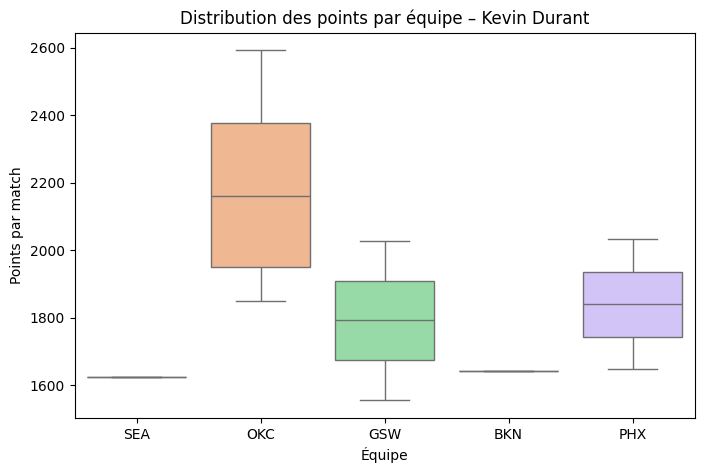

In [23]:
import seaborn as sns

plt.figure(figsize=(8,5))
sns.boxplot(x="TEAM_ABBREVIATION", y="PTS", data=df, palette="pastel")

plt.title("Distribution des points par équipe – Kevin Durant")
plt.xlabel("Équipe")
plt.ylabel("Points par match")
plt.show()

In [31]:
def plt_scatter(x, y, data, xlabel, ylabel, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, data=data, s=80, color="blue", marker="o")
    sns.regplot(x=x, y=y, data=data, scatter=False, color="red", label="Tendance")
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()


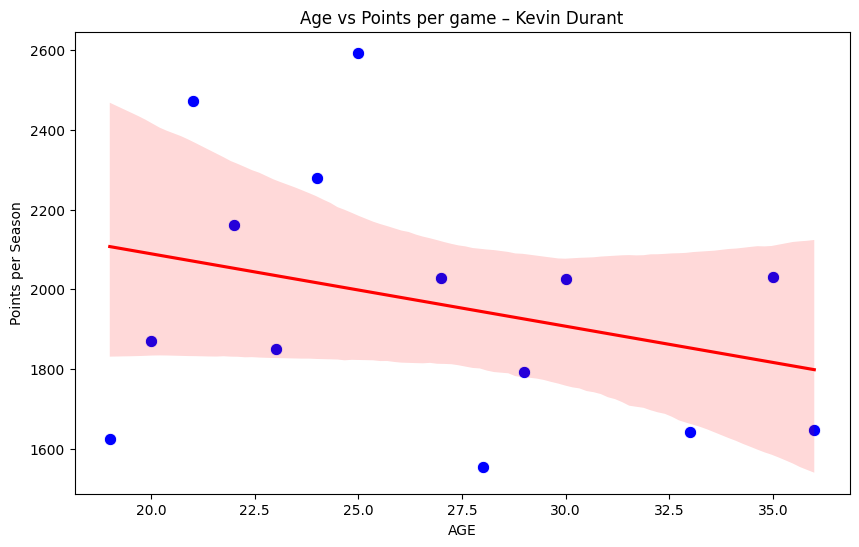

In [32]:
plt_scatter('PLAYER_AGE', 'PTS', df, 'AGE', 'Points per Season', "Age vs Points per game – Kevin Durant")

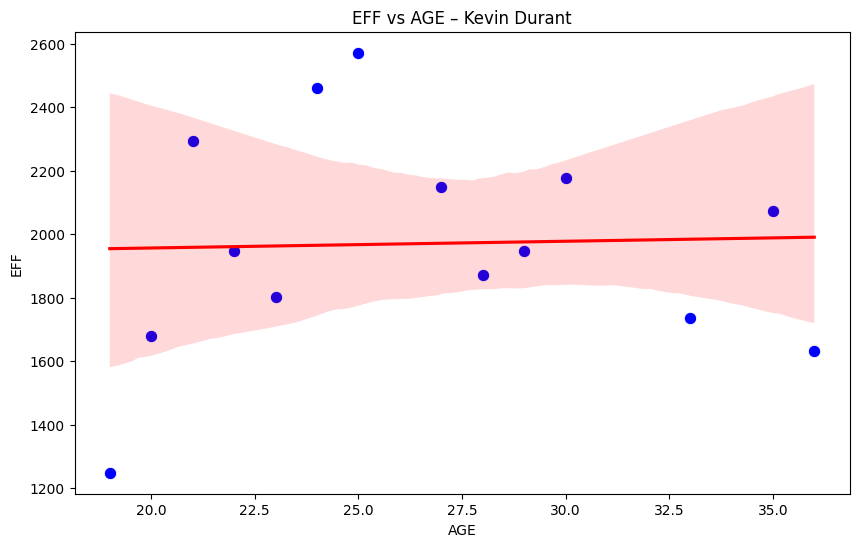

In [33]:
plt_scatter('PLAYER_AGE', 'EFF', df, 'AGE', 'EFF', "EFF vs AGE – Kevin Durant")

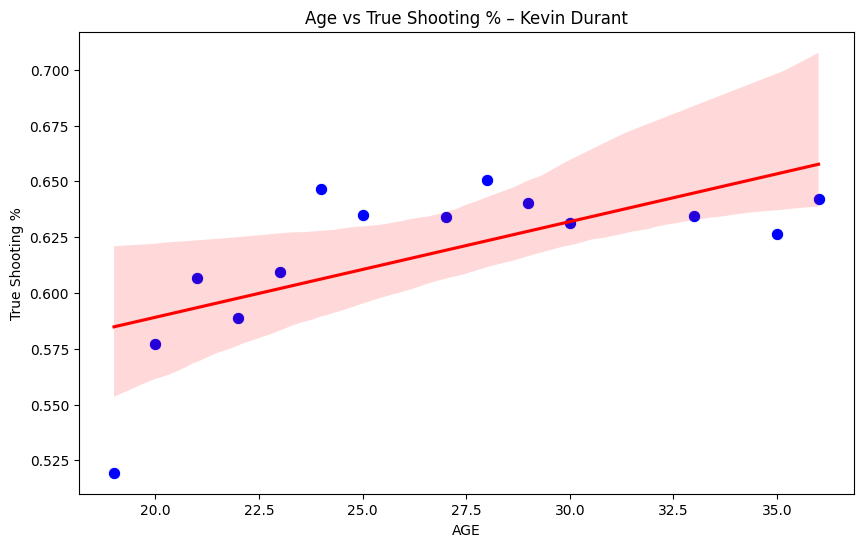

In [34]:
plt_scatter('PLAYER_AGE', 'TS_PCT', df, 'AGE', 'True Shooting %', "Age vs True Shooting % – Kevin Durant")